In [2]:
import pandas as pd

# Load the Titanic dataset
file_path = r'C:\Users\Banele\OneDrive\Desktop\CodSoft\codsoft data\Titanic-Dataset.csv'  # Replace with your actual file path
titanic_df = pd.read_csv(file_path)

# Display the first 3 rows
titanic_df.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
# Check for missing values and data types
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Check for missing values in each column
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Summary statistics
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


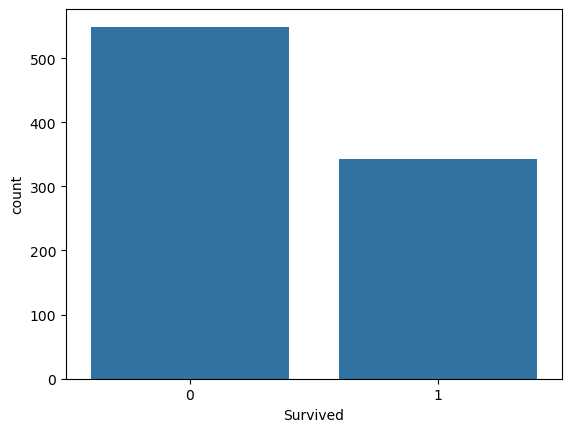

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival count plot
sns.countplot(x='Survived', data=titanic_df)
plt.show()

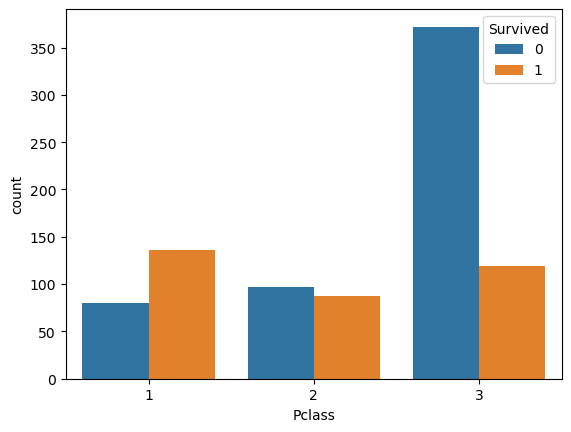

In [12]:
# Survival based on passenger class
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.show()

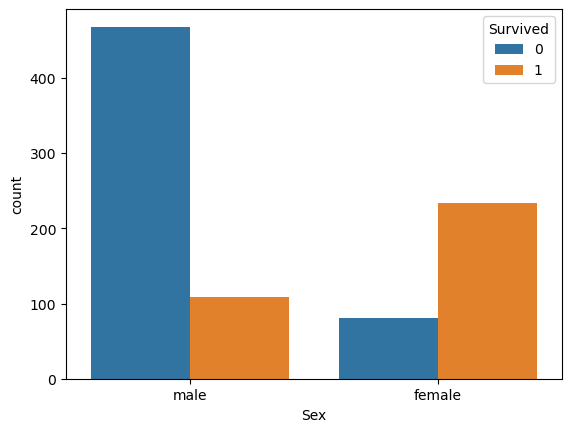

In [14]:
# Survival based on gender
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.show()

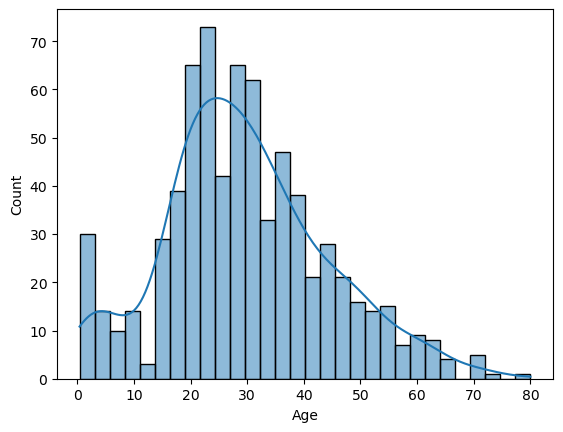

In [16]:
# Age distribution plot
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.show()

In [22]:
# Fill missing values in Age with median
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

In [24]:
# Fill missing values in Embarked with the most frequent value
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [26]:
# Drop the Cabin column due to many missing values
titanic_df = titanic_df.drop('Cabin', axis=1)

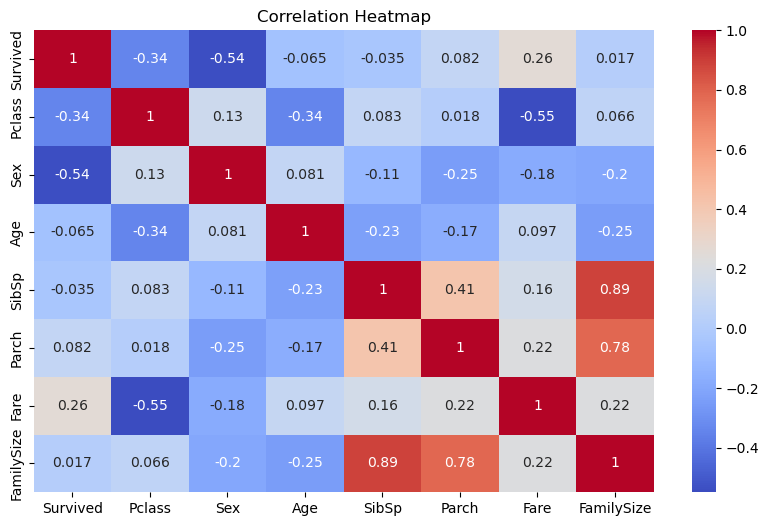

In [66]:
import numpy as np
# Select only numeric columns for correlation
numeric_df = titanic_df.select_dtypes(include=[np.number])

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [30]:
# Recheck for missing values in each column
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
# THE DATA IS NOW CLEAN FREE OF MISSING VALUES

In [34]:
# Convert Sex column to numerical: male -> 1, female -> 0
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 1, 'female': 0})


In [36]:
# One-hot encode the Embarked column
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

In [38]:
# Create FamilySize feature
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']


In [40]:
# Drop unnecessary columns
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [42]:
titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize
0,0,3,1,22.0,1,0,7.2500,False,True,1
1,1,1,0,38.0,1,0,71.2833,False,False,1
2,1,3,0,26.0,0,0,7.9250,False,True,0


In [44]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [46]:
# Split data into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create a dictionary of models
models = {
    'Logistic Regression': log_reg,
    'Random Forest': random_forest,
    'Gradient Boosting': gradient_boosting
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")



Training Logistic Regression...
Logistic Regression Accuracy: 0.8097014925373134
Confusion Matrix:
[[136  21]
 [ 30  81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268


Training Random Forest...
Random Forest Accuracy: 0.7686567164179104
Confusion Matrix:
[[127  30]
 [ 32  79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       157
           1       0.72      0.71      0.72       111

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268


Training Gradient Boosting...
Gradient Boosting Accuracy: 0.80970

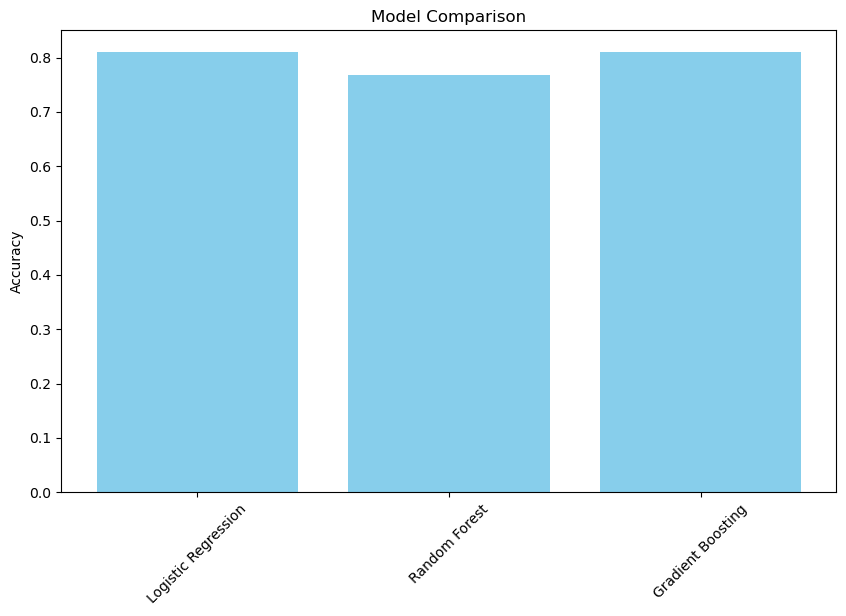

In [56]:
import matplotlib.pyplot as plt

# Store accuracy scores for comparison
accuracy_scores = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.show()

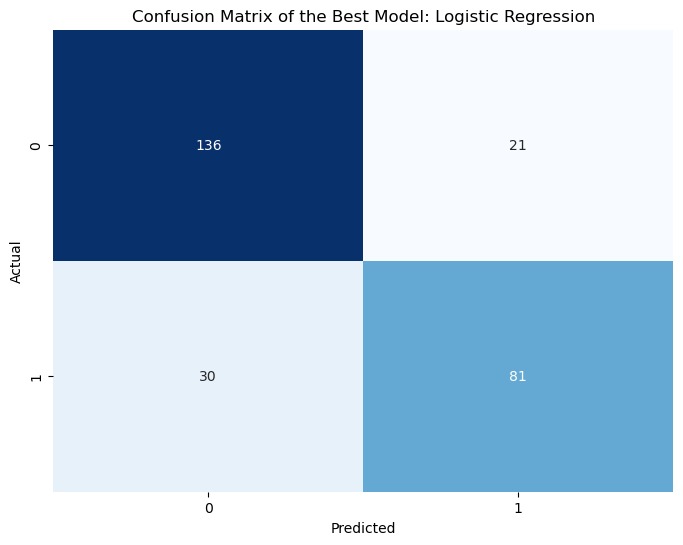

In [59]:
# Find the best model based on accuracy
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]

# Predict using the best model
y_pred_best = best_model.predict(X_test)

# Plot confusion matrix for the best model
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix of the Best Model: {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


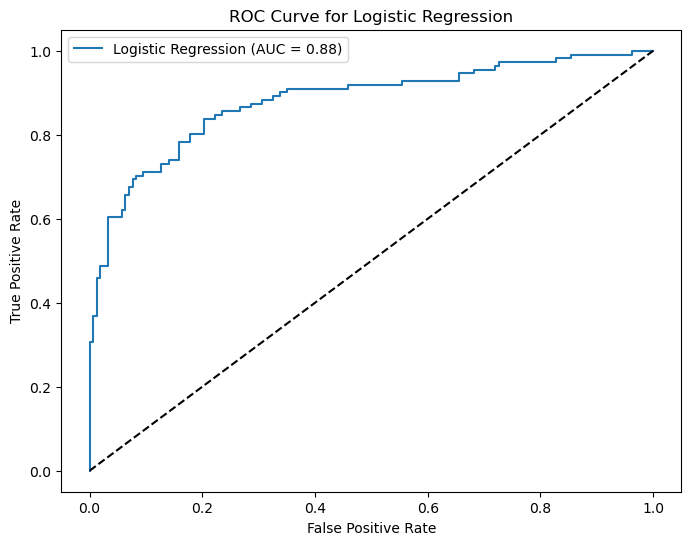

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC Curve for the best model
y_prob = best_model.predict_proba(X_test)[:, 1]  # Get the predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_model_name}')
plt.legend(loc='best')
plt.show()